In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

# ------------- CONSTANTES -------------
RANDOM_STATE = 42 # Constante para reproducibilidade 

# Coloca a precisão de float com 2 casas para praticidade
pd.set_option("display.precision", 2)
sns.set_theme(style="whitegrid")


# Lê o dataset
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv", dtype=int)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [2]:
print(f"O dataset inteiro tem {df.shape[0]} registros")

O dataset inteiro tem 253680 registros


## Parte 1: Exploração e Tratamento de Dados

Checar se há valores faltantes e outliers

In [3]:
df.isnull().sum().to_frame() # Nada aqui!

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


Para questão de brevidade, e para focarmos a nossa análise, iremos tirar os fatores socio-econômicos do dataset e focar apenas nos fatores de saúde e hábitos. Sendo assim, estão fora da jogada os atributos: 

- AnyHealthcare
- NoDocbcCost
- Education
- Income

In [4]:
df.drop(["AnyHealthcare", "NoDocbcCost", "Education", "Income"], axis=1, inplace=True)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,5,30,30,1,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,2,0,0,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,2,3,0,0,0,11


Para ajudar a nossa análise, vamos usar essa tabela de classificação de Índice de Massa Corporal (BMI) para essa análise:

- Acima de 40,0. Obesidade. grau III.
- Entre 35,0 e 39,9. Obesidade grau II. 
- Entre 30,0 e 34,9. Obesidade grau I.
- Entre 25,0 e 29,9. Sobrepeso.
- Entre 18,6 e 24,9. Normal.
- 18,5 ou menos. Magreza.


In [5]:
df[["BMI", "MentHlth", "PhysHlth", "Age"]].describe()

,BMI,MentHlth,PhysHlth,Age
count,253680.00,253680.00,253680.00,253680.00
mean,28.38,3.18,4.24,8.03
std,6.61,7.41,8.72,3.05
min,12.00,0.00,0.00,1.00
25%,24.00,0.00,0.00,6.00
50%,27.00,0.00,0.00,8.00
75%,31.00,2.00,3.00,10.00
max,98.00,30.00,30.00,13.00


Como a maioria dos campos são Booleanos, vamos plotar apenas aqueles que inteiros, para enxergar se há outliers.

/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


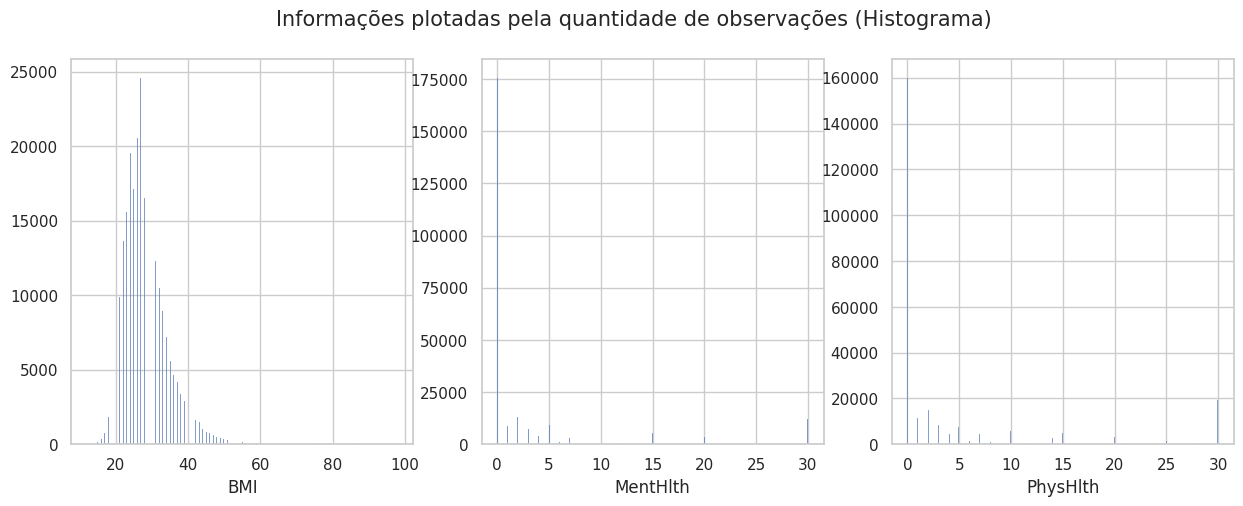

In [6]:
fig, axs = plt.subplots(ncols=3, nrows=1)
fig.set_size_inches(15, 5)

sns.histplot(df["BMI"], ax=axs[0]).set(ylabel=None)
sns.histplot(df["MentHlth"], ax=axs[1]).set(ylabel=None)
sns.histplot(df["PhysHlth"], ax=axs[2]).set(ylabel=None)

fig.suptitle("Informações plotadas pela quantidade de observações (Histograma)", fontsize=15);

O "BMI" está com um tail-end um tanto estranho, e podemos dizer que os valores > 60 são poucos e outliers (com base na nossa escala de BMI, todos eles estariam no mesmo grupo, de qualquer forma). Podemos deixar isso melhor colocando a média de BMIs de 50 até 100 pra nivelar esses valores.

In [7]:
# Quantidade de valores acima de 60 de BMI
len(df.loc[df["BMI"] >= 60])

868

In [8]:
# Vamos interpretar essa parte como "BMI" maior que 60
bmi_mean = df.loc[df["BMI"] >= 50]["BMI"].mean()
print(f"Média do BMI maior que 50: {bmi_mean}")
df.loc[df["BMI"] >= 60, "BMI"] = int(bmi_mean)

Média do BMI maior que 50: 60.4263839811543


Aqui vamos plotar as variáveis para analisar as correlações entre elas e a diabetes.

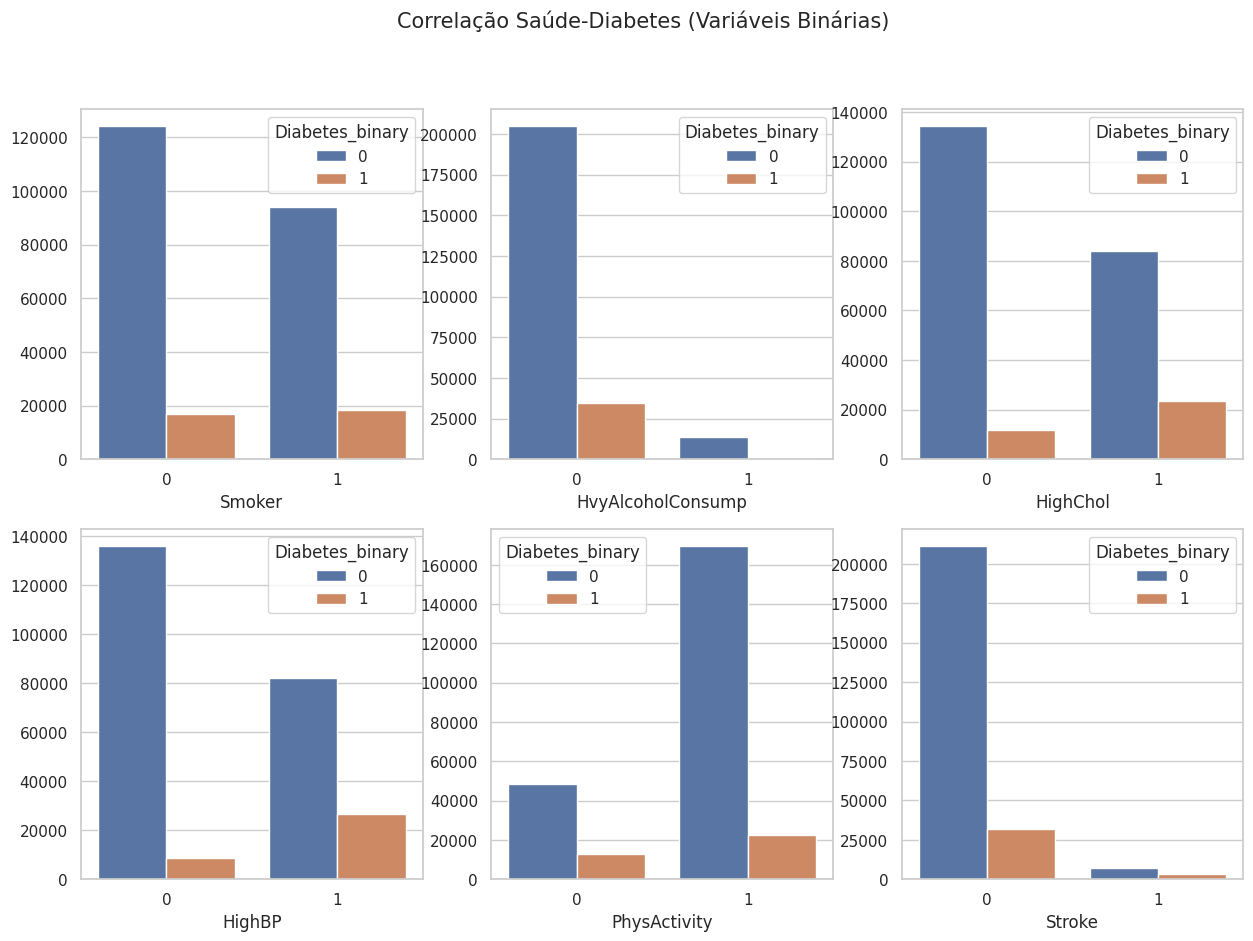

In [9]:
fig, axs = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(15, 10)

sns.countplot(data=df, x="Smoker", hue="Diabetes_binary", ax=axs[0,0]).set(ylabel=None)
sns.countplot(data=df, x="HvyAlcoholConsump", hue="Diabetes_binary", ax=axs[0,1]).set(ylabel=None)
sns.countplot(data=df, x="HighChol", hue="Diabetes_binary", ax=axs[0,2]).set(ylabel=None)
sns.countplot(data=df, x="HighBP", hue="Diabetes_binary", ax=axs[1,0]).set(ylabel=None)
sns.countplot(data=df, x="PhysActivity", hue="Diabetes_binary", ax=axs[1,1]).set(ylabel=None)
sns.countplot(data=df, x="Stroke", hue="Diabetes_binary", ax=axs[1,2]).set(ylabel=None);

fig.suptitle("Correlação Saúde-Diabetes (Variáveis Binárias)", fontsize=15);

Pelas correlações, podemos descartar o atributo "HvyAlcoholConsump", uma vez que ele tem uma correlação com diabetes muito pequena para ser de interesse no nosso modelo. De resto, todas os nossos atributos binários possuem uma correlação de interesse para detectar diabetes.

In [10]:
df.drop(["HvyAlcoholConsump"], axis=1, inplace=True)
df.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,5,18,15,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,3,0,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,5,30,30,1,0,9


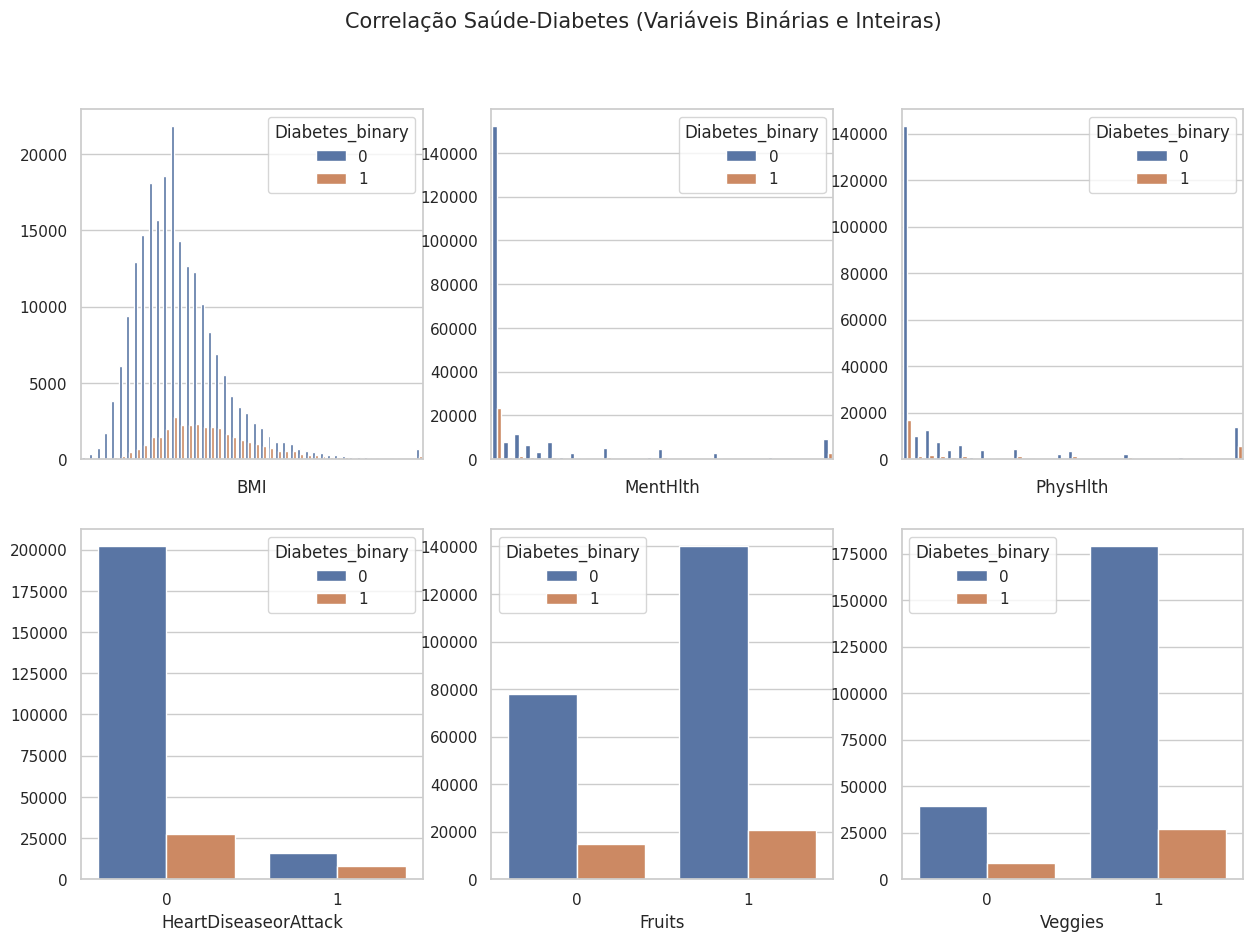

In [11]:
fig, axs = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(15, 10)

sns.countplot(df.loc[df["BMI"] >= 15], x="BMI", hue="Diabetes_binary", ax=axs[0,0]).set(ylabel=None, xticklabels=[])
sns.countplot(data=df, x="MentHlth", hue="Diabetes_binary", ax=axs[0,1]).set(ylabel=None, xticklabels=[])
sns.countplot(data=df, x="PhysHlth", hue="Diabetes_binary", ax=axs[0,2]).set(ylabel=None, xticklabels=[])
sns.countplot(data=df, x="HeartDiseaseorAttack", hue="Diabetes_binary", ax=axs[1,0]).set(ylabel=None)
sns.countplot(data=df, x="Fruits", hue="Diabetes_binary", ax=axs[1,1]).set(ylabel=None)
sns.countplot(data=df, x="Veggies", hue="Diabetes_binary", ax=axs[1,2]).set(ylabel=None);

fig.suptitle("Correlação Saúde-Diabetes (Variáveis Binárias e Inteiras)", fontsize=15);

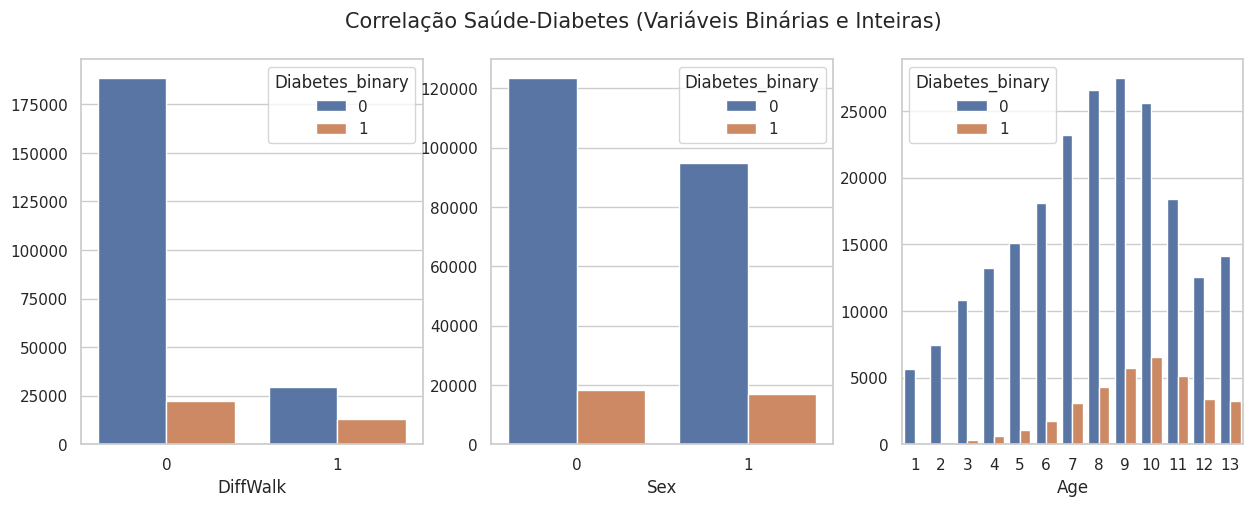

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=1)
fig.set_size_inches(15, 5)

sns.countplot(data=df, x="DiffWalk", hue="Diabetes_binary", ax=axs[0]).set(ylabel=None)
sns.countplot(data=df, x="Sex", hue="Diabetes_binary", ax=axs[1]).set(ylabel=None)
sns.countplot(data=df, x="Age", hue="Diabetes_binary", ax=axs[2]).set(ylabel=None)

fig.suptitle("Correlação Saúde-Diabetes (Variáveis Binárias e Inteiras)", fontsize=15);

As duas últimas análises retornaram pelo menos alguma correlação com o nosso atributo-alvo, portanto iremos colocar esse restante. Vamos partir para uma análise entre as váriaveis.

## Parte 2: Pipeline de dados

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separação dos atributos preditores e do alvo de predição
X = df[[x for x in df.columns.tolist() if x != "Diabetes_binary"]]
y = df['Diabetes_binary'].copy()

# Colunas numéricas
numerics = ["PhysHlth", "MentHlth", "BMI", "Age"]

# Colunas de Categóricas
categories = [att for att in X.columns.tolist() if att not in numerics]

# Pipeline de tratamento dos dados numéricos
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("normalize", StandardScaler())
])
df_num = X[numerics]
num_pipeline.fit_transform(df_num)

# Pipeline de tratamento de dados categoricos e agregação de colunas
full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerics),
    ("one_hot", OneHotEncoder(sparse_output=False), categories),
])

X_treated = full_pipeline.fit_transform(X)
X_treated

array([[ 1.23399871,  1.99859213,  1.85948581, ...,  1.        ,
         1.        ,  0.        ],
       [-0.48659241, -0.42962961, -0.5309287 , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.95458982,  3.61740662, -0.0528458 , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.48659241, -0.42962961, -0.0528458 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.48659241, -0.42962961, -0.84965064, ...,  0.        ,
         0.        ,  1.        ],
       [-0.48659241, -0.42962961, -0.5309287 , ...,  0.        ,
         1.        ,  0.        ]])

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, ConfusionMatrixDisplay

# Dá um reset no tema do seaborn
sns.set_theme(style="white")

# Split de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X_treated, y, test_size=0.2, random_state=42)

Uma vez que o nosso dataset é majoritariamente de valores binários, é interessante testá-lo em um modelo que se dá bem com esse tipo de dados, neste caso vamos fazer um primeiro teste com uma árvore de decisão:

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


params = {
    'criterion': ["gini", "entropy", "log_loss"],
}
treegrid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=3)
treegrid.fit(X_train, y_train)

# Pega o melhor modelo retornado pelo Grid
tree = treegrid.best_estimator_
del treegrid

In [16]:
predictions = tree.predict(X_test)
predictions

print("Precisão: ", precision_score(y_test, predictions), "\nRevocação: ", recall_score(y_test, predictions))
print("F1-Score: ", f1_score(y_test, predictions))

Precisão:  0.317900769114764 
Revocação:  0.30127197370301556
F1-Score:  0.30936307601995894


Vamos testar alguns outros modelos para entender como que cada um se comporta com os nossos dados: 

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

params = { 
    'C': [.1, .25, .50, .75, 1],
    'max_iter' : [100, 500, 1000]
}
loggrid = GridSearchCV(LogisticRegression(random_state=42), params)
loggrid.fit(X_train, y_train)


# Pega o melhor modelo retornado pelo Grid
logg = loggrid.best_estimator_
del loggrid

In [18]:
predictions = logg.predict(X_test)
predictions

print("Precisão: ", precision_score(y_test, predictions), "\nRevocação: ", recall_score(y_test, predictions))
print("F1-Score: ",f1_score(y_test, predictions))

Precisão:  0.5581278309008556 
Revocação:  0.15849649849935687
F1-Score:  0.2468833481745325


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion': ["gini", "entropy", "log_loss"],
    'n_estimators': [100, 300, 500],
}

forestgrid = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=3)
forestgrid.fit(X_train, y_train)

# Pega o melhor modelo retornado pelo Grid
forest = forestgrid.best_estimator_
del forestgrid

/home/breno/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [20]:
predictions = forest.predict(X_test)
predictions

print("Precisão: ", precision_score(y_test, predictions), "\nRevocação: ", recall_score(y_test, predictions))
print("F1-Score: ",f1_score(y_test, predictions))

Precisão:  0.41881051175656986 
Revocação:  0.21637844790624552
F1-Score:  0.285337353938937


### K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    "n_neighbors": list(range(3, 30)), # Vai testar todos os valores na faixa de 3 - 30
    "weights": ['uniform', 'distance']
}
knngrid = GridSearchCV(KNeighborsClassifier(), params, n_jobs=3)
knngrid.fit(X_train, y_train)

# Pega o melhor modelo retornado pelo Grid
knn = knngrid.best_estimator_
del knngrid

In [22]:
predictions = knn.predict(X_test)
predictions

print("Precisão: ", precision_score(y_test, predictions), "\nRevocação: ", recall_score(y_test, predictions))
print("F1-Score: ", f1_score(y_test, predictions))

Precisão:  0.5369299935773925 
Revocação:  0.11947977704730599
F1-Score:  0.1954641103577274


### Naive-Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

# https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
params = { 
    'var_smoothing': np.logspace(0,-9, num=100)
}
bayesgrid = GridSearchCV(GaussianNB(), params)
bayesgrid.fit(X_train, y_train)

# Pega o melhor modelo retornado pelo Grid
bayes = bayesgrid.best_estimator_
del bayesgrid

In [24]:
predictions = bayes.predict(X_test)
predictions

print("Precisão: ", precision_score(y_test, predictions), "\nRevocação: ", recall_score(y_test, predictions))
print("F1-Score: ",f1_score(y_test, predictions))

Precisão:  0.44785553047404064 
Revocação:  0.1417750464484779
F1-Score:  0.21537125488493272


### Support Vector Machine

In [25]:
from sklearn.svm import LinearSVC

params = { 
    'C': [.1, .25, .50, .75, 1],
}
svcgrid = GridSearchCV(LinearSVC(random_state=42, dual="auto"), params, n_jobs=2)
svcgrid.fit(X_train, y_train)

# Pega o melhor modelo retornado pelo Grid
svc = svcgrid.best_estimator_
del svcgrid

In [26]:
predictions = svc.predict(X_test)
predictions

print("Precisão: ", precision_score(y_test, predictions), "\nRevocação: ", recall_score(y_test, predictions))
print("F1-Score: ", f1_score(y_test, predictions))

Precisão:  0.5988571428571429 
Revocação:  0.07488923824496213
F1-Score:  0.13313008130081302


### Parte Final: Métricas do Modelo Ótimo

30% de revocação e de preocisão é pífio, mas o nosso modelo ao menos é bom em dizer caso uma pessoa não é diabética, mas se comparar o falso negativos, tudo vai pelos ares. Pelo menos podemos dizer com certeza que não importa o quão simples um modelo possa ser, dado o dataset de fisionomia correta, ele pode brilhar, como é o caso do nosso dataset. Sendo um modelo simples quanto árvore de decisão foi o suficiente pra ter as melhores métricas (ainda que baixas, foram as melhores.)

In [33]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, accuracy_score

predictions = tree.predict(X_test)
predictions

print("Acurácia: ", accuracy_score(y_test, predictions))
print("Precisão: ", precision_score(y_test, predictions), "\nRevocação: ", recall_score(y_test, predictions))
print("F1-Score: ", f1_score(y_test, predictions))
print("AUC ROC Score: ", roc_auc_score(y_test, predictions))


print("Cross Validation Score de F1-Score (Média): ", cross_val_score(tree, X_treated, y, cv=10, scoring="f1").mean())


Acurácia:  0.814490696941028
Precisão:  0.317900769114764 
Revocação:  0.30127197370301556
F1-Score:  0.30936307601995894
AUC ROC Score:  0.5989315583094743
Cross Validation Score de F1-Score (Média):  0.3065176173242611


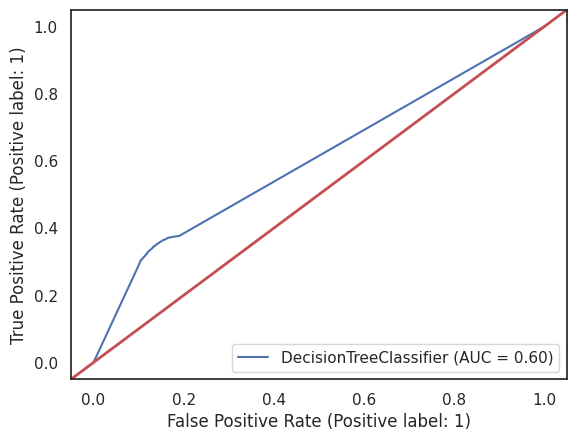

In [28]:
RocCurveDisplay.from_estimator(tree, X_test, y_test, pos_label=1);
plt.axline((0, 0), (1, 1), linewidth=2, color='r');

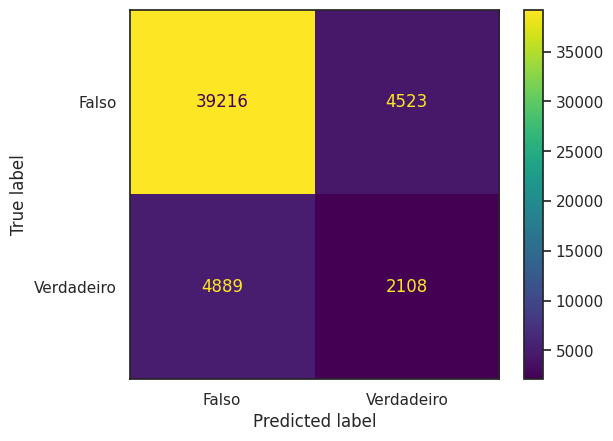

In [29]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, display_labels=["Falso", "Verdadeiro"]);

In [30]:
print("Hiperparâmetros do modelo:")
tree.get_params()

Hiperparâmetros do modelo:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [31]:
f"Quantidade de Folhas da Árvore de Decisão: {tree.get_n_leaves()}"

'Quantidade de Folhas da Árvore de Decisão: 39971'

In [32]:
f"Profundidade da Árvore: {tree.get_depth()}"

'Tamanho da Árvore: 36'